**Analysis of the Data given by TechaSoft Pvt Ltd**                **By Mohamed Owais** 

1)I have used json module to parse the data as it may contain nested structures and in order to load 
the data may it be in the form of arrays,objects,other json structures etc
2)I have converted the data of each line into dictionary using "json.loads" 

In [1]:
import json
import pandas as pd

# Load json file
with open('listhub.json', 'r') as file:
    raw_data = file.readlines()  # Read each line

# Convert each line to a Dictionary 
json_data = [json.loads(line) for line in raw_data]

# Convert to a DataFrame 
df = pd.DataFrame(json_data)

df.head()

,@odata.id,AccessibilityFeatures,AccessibleElevatorInstalled,Appliances,ArchitecturalStyle,Basement,BathroomsFull,BathroomsHalf,BathroomsOneQuarter,BathroomsThreeQuarter,...,UnitNumber,UnparsedAddress,Utilities,Vegetation,View,WaterfrontFeatures,WaterfrontYN,WindowFeatures,YearBuilt,YearBuiltEffective
0,https://api.listhub.com/odata/Property('3yd-MA...,[],None,"[Dishwasher, Dryer, Ice Maker, Microwave, Oven...",[Contemporary],None,9,4,0,0,...,None,4736 N Bay Rd,[Cable Available],[],[Water],"[Ocean Access, Waterfront]",True,[Skylight(s)],2024.0,None
1,https://api.listhub.com/odata/Property('3yd-MA...,[],None,[],[Other],None,0,0,0,0,...,None,Smoke Shop Near Fiu SW 107 AVe,[],[],[],[],False,[],NaN,None
2,https://api.listhub.com/odata/Property('3yd-MA...,[Accessible Elevator Installed],None,"[Dishwasher, Dryer, Microwave, Range, Refriger...",[Other],None,1,1,0,0,...,503,1605 Bay Rd,[Cable Available],[],[],[],False,[],1982.0,None
3,https://api.listhub.com/odata/Property('3yd-MA...,"[Accessible Approach with Ramp, Accessible Ele...",None,"[Dishwasher, Dryer, Microwave, Range, Refriger...",[High Rise],None,1,0,0,0,...,702,140 S Dixie Hwy,[],[],[],[],False,[],2007.0,None
4,https://api.listhub.com/odata/Property('3yd-MA...,[],None,"[Dishwasher, Dryer, Garbage Disposer, Trash Co...",[Other],None,2,0,0,0,...,910,5252 NW 85th Ave,[],[],[Golf Course],[],False,[],2016.0,None


In [2]:
df.size # Size of the data given 

427905

In [3]:
df.shape

(3855, 111)

**Task 1 : Identify Nullable Fields:****1) Find all the fields that are nullabl**.**2)  For those fields, calculate the total occurrences of null valu**s.

In [4]:
# Find all columns with null values and their counts
null_counts = df.isnull().sum()
nullable_fields = null_counts[null_counts > 0]  # Only columns with null values

# Display nullable fields and their null value counts
print(nullable_fields)

AccessibleElevatorInstalled     3855
Basement                        3855
BuilderName                     3523
Country                            5
CountyOrParish                     3
Directions                       328
ElementarySchool                2250
ElementarySchoolDistrict        3851
Elevation                       3855
EntryLevel                      3763
FranchiseAffiliation            2697
HighSchool                      2213
HighSchoolDistrict              3851
LandLeaseAmountFrequency        3855
Latitude                         277
LeaseAmountFrequency            3126
ListAgentFax                    3855
ListAgentURL                     528
ListPriceLow                    3855
ListingContractDate              349
Location                         277
Longitude                        277
LotSizeAcres                     703
LotSizeArea                      802
MiddleOrJuniorSchool            2238
MiddleOrJuniorSchoolDistrict    3851
NumberOfUnitsTotal              3831
P

2. **Identify 'Lake View' Properties:**
a)Use regular expressions to determine whether a property has a lake view.
b)Search for mentions of "lake view" in the following fields:
 PublicRemarks
 WaterfrontFeatures[]
 View[]

The **re module** in Python provides support for working with regular expressions (regex). A regular expression is a sequence of characters that defines a search pattern. Regular expressions are used for matching, searching, and manipulating strings in Python.

In [5]:
import re
import pandas as pd

# Define a function to check for "lake view"
def has_lake_view(*fields):
    combined_text = ''
    for field in fields:
        if isinstance(field, list):  # If the field is a list
            field = ' '.join(map(str, field))  # Join list elements into a single string
        if pd.notnull(field):  # Check if the field is not null
            combined_text += str(field) + ' '  # Add to combined text if not null
    # Search for "lake view" (case-insensitive)
    return bool(re.search(r'\blake view\b', combined_text, flags=re.IGNORECASE))

# Apply the function to relevant columns
df['LakeView'] = df.apply(
    lambda row: has_lake_view(row.get('PublicRemarks'), row.get('WaterfrontFeatures'), row.get('View')), axis=1
)

# Display the resulting column
print(df[['LakeView']])

      LakeView
0        False
1        False
2        False
3        False
4        False
...        ...
3850     False
3851     False
3852     False
3853     False
3854     False

[3855 rows x 1 columns]


In [6]:
print(df['LakeView'].value_counts())

LakeView
False    3814
True       41
Name: count, dtype: int64


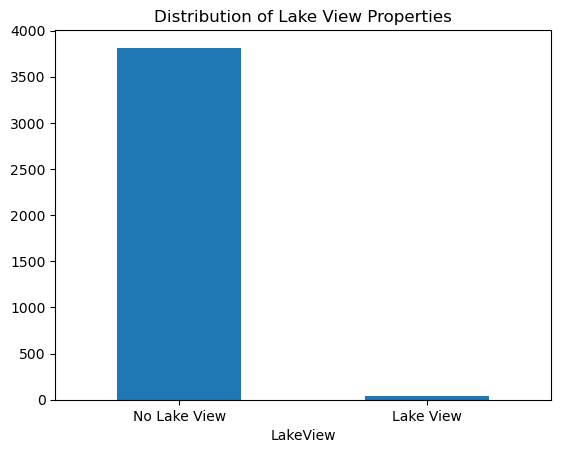

In [7]:
import matplotlib.pyplot as plt
df['LakeView'].value_counts().plot(kind='bar', title='Distribution of Lake View Properties')
plt.xticks([0, 1], ['No Lake View', 'Lake View'], rotation=0)
plt.show()

**Analysis**
**(1)No of times the word "LakeView" appears : 41**
**(2)No of times the word "LakeView" did not appear : 3814**

In [8]:
df.columns

Index(['@odata.id', 'AccessibilityFeatures', 'AccessibleElevatorInstalled',
       'Appliances', 'ArchitecturalStyle', 'Basement', 'BathroomsFull',
       'BathroomsHalf', 'BathroomsOneQuarter', 'BathroomsThreeQuarter',
       ...
       'UnparsedAddress', 'Utilities', 'Vegetation', 'View',
       'WaterfrontFeatures', 'WaterfrontYN', 'WindowFeatures', 'YearBuilt',
       'YearBuiltEffective', 'LakeView'],
      dtype='object', length=112)